<a href="https://colab.research.google.com/github/xr-cc/proj-hsg-env-chal/blob/master/code/data_explore_public_hsg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# install Basemap for visualization

!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

In [1]:
# grant access to Google Drive
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd

In [4]:
# load data
dataPath = "/content/drive/My Drive/DS4A/DS4A_Team31/data/lihtcpub/"
df = pd.read_csv(dataPath+"LIHTCPUB.CSV",engine='python')

In [6]:
df.head()

,hud_id,project,proj_add,proj_cty,proj_st,proj_zip,state_id,contact,company,co_add,co_cty,co_st,co_zip,co_tel,latitude,longitude,place1990,place2000,place2010,fips1990,fips2000,fips2010,scattered_site_cd,resyndication_cd,allocamt,n_units,li_units,n_0br,n_1br,n_2br,n_3br,n_4br,inc_ceil,low_ceil,ceilunit,yr_pis,yr_alloc,non_prof,basis,bond,mff_ra,fmha_514,fmha_515,fmha_538,home,home_amt,tcap,tcap_amt,cdbg,cdbg_amt,htf,htf_amt,fha,hopevi,hpvi_amt,tcep,tcep_amt,rad,qozf,qozf_amt,rentassist,trgt_pop,trgt_fam,trgt_eld,trgt_dis,trgt_hml,trgt_other,trgt_spc,type,credit,n_unitsr,li_unitr,metro,dda,qct,nonprog,nlm_reason,nlm_spc,datanote,record_stat
0,AKA0000X003,EAGLE RIDGE TOWNHOMES,1775 NORTH THUMA,PALMER,AK,99645,AK-05-23,EAGLE RIDGE OF PALMER LP,EAGLE RIDGE OF PALMER LP,THUMA STREET LLC,PALMER,AK,99610,907-262-5962,61.587872,-149.099777,NaN,NaN,58660.0,02XXXXXXXXX,02170001200,02170001201,NaN,NaN,NaN,33.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,NaN,0.0,8888,8888,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.0,33.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,X
1,AKA0000X018,"GATEWAY-SEWARD ASSOCIATES, LTD PTN",1810 PHOENIX ROAD,SEWARD,AK,99664,AK-99-99,DAVID J CORDES,GATEWAY SEWARD ASSC LTD PTR,NaN,SEWARD,AK,88016,303-617-1297,60.125469,-149.446060,NaN,NaN,68560.0,02XXXXXXXXX,02XXXXXXXXX,02122001300,NaN,NaN,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,9999,9999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,20.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,AKA0000X022,"JUNEAU AFFORDABLE RENTALS, LLC",SCATTERED SITE,JUNEAU,AK,99801,AK-99-99,ASHLEY DAVIS,TLINGIT HAIDA REGIONAL HOUSING AUTHORITY,5446 JENKINS DR,JUNEAU,AK,99801,907-780-3160,58.383499,-134.437698,NaN,NaN,36400.0,02XXXXXXXXX,02XXXXXXXXX,02110000400,1.0,2.0,NaN,25.0,25.0,0.0,0.0,0.0,20.0,5.0,2.0,1.0,25.0,9999,9999,1.0,2.0,NaN,2.0,2.0,2.0,NaN,2.0,0.0,2.0,0.0,2.0,0.0,2.0,0.0,2.0,2.0,0.0,2.0,0.0,2.0,NaN,0.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,25.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
3,AKA0000X024,"MILL BAY TOWNHOMES, LLC",1223 MILL BAY ROAD,KODIAK,AK,99615,AK-99-99,NaN,"MILL BAY TOWNHOMES, LLC",1113 W. FIREWEED LANE #202,KODIAK,AK,99503,NaN,57.796501,-152.392258,NaN,NaN,40950.0,02XXXXXXXXX,02XXXXXXXXX,02150000200,NaN,NaN,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,9999,9999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,20.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
4,AKA0000X030,TURNAGAIN PLACE APTS,2708 COHO WAY,ANCHORAGE,AK,99517,AK-99-99,NaN,TURNAGAIN PLACE LLC,1113 WEST FIREWEED LANE #202,ANCHORAGE,AK,99503,NaN,61.205101,-149.930298,NaN,NaN,3000.0,02XXXXXXXXX,02XXXXXXXXX,02020001300,NaN,NaN,NaN,29.0,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,9999,9999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,29.0,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N


In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

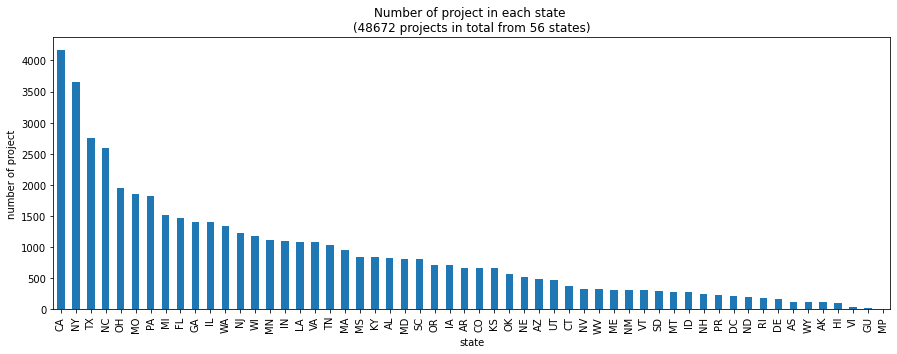

In [14]:
num_proj = len(df)
num_state = df['proj_st'].nunique()

ax = df['proj_st'].value_counts().plot(kind='bar',figsize=(15,5),
                                       title="Number of project in each state \n({} projects in total from {} states)".format(num_proj, num_state))
ax.set_xlabel("state")
ax.set_ylabel("number of project")
pass

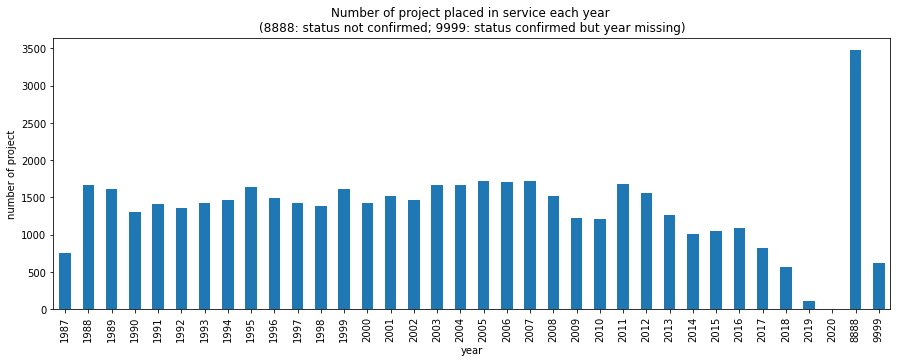

In [17]:
ax = df['yr_pis'].value_counts().sort_index().plot(kind='bar',figsize=(15,5),
                                       title="Number of project placed in service each year \n(8888: status not confirmed; 9999: status confirmed but year missing)")
ax.set_xlabel("year")
ax.set_ylabel("number of project")
pass

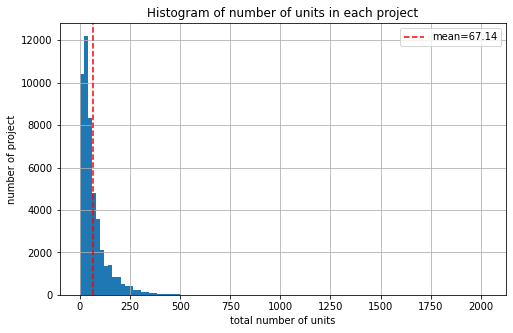

In [40]:
ax = df['n_unitsr'].hist(bins=100,  figsize=(8,5))
ax.set_xlabel("total number of units")
ax.set_ylabel("number of project")
ax.set_title("Histogram of number of units in each project")
ax.axvline(x=df['n_unitsr'].mean(),color='r', linestyle='--',label='mean={:.2f}'.format(df['n_unitsr'].mean()))
ax.legend()
pass

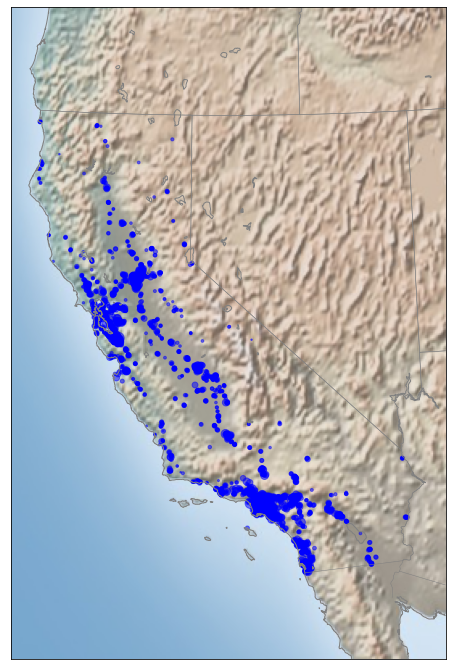

In [61]:
# plot data of a specific state, scaled by size

state = 'CA'
df_state = df[df['proj_st']==state]
lat = df_state['latitude'].values
lon = df_state['longitude'].values
num_units = df_state['n_unitsr'].values
# years = df_state['yr_pis'].values

# plt background map
fig = plt.figure(figsize=(12, 12))
m = Basemap(projection='lcc', resolution='f', 
            lat_0=37.5, lon_0=-119,
            width=1E6, height=1.5E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

# plot data
m.scatter(lon, lat, latlon=True,
          c=[(0,0,1,0.1)], s=num_units*0.2, alpha=0.5) #edgecolors=[(0,0,0,0.1)], 

pass